##  PROJECT

#### Loading Libraries and the Data Set

In [1]:
#Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#to plot the graphs inline on jupyter notebook
import statsmodels.api as sm
from statsmodels.formula.api import logit

# And some function we will need
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

### A. DATA PREPARATION

In [2]:
#We read the data, and take a look a the first 5 rows
heart_df=pd.read_csv(r"C:\Users\14034\Desktop\DATA SCIENCE\STATISTICS FOR DATA SCIENCE\Group Project\FINAL GROUP PROJECT\heart.csv")

In [3]:
#Let's look at the first 5 rows
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Also look at the last 5 rows
heart_df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#Rows and columns in the dataset
heart_df.shape

(303, 14)

In [6]:
#Let's gain knowledge about the data summary statistics to determine if there are any anomaly in the data
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#column names in the dataset
print(heart_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


### Data Pre-processing

The first step here was to identify and remove duplicated rows, next was to identify and remove rows containing missing values. Also, the box and whisker
plots were used to detect outliers, and the rows with
outliers (i.e. values that are outside the range of -3δ and +3δ)
were subsequently removed. 

In [8]:
#Let's look at the data types of the attributes
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


There are 303 observations, with 303 rows and 14 columns in the dataset. The data types for the independent variables include integer 64 and a float, while the dependent variable (target) has an integer64 datatype

#### Data Pre-processing -Identify Missing Values

In [9]:
#Check for Missing Values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# From we dont have any missing data

#### Data Pre-processing -Find Duplicate Rows based on all columns

In [11]:
#We used the 'loc' method, passing keep=False (Boolean) to mark all duplicates in the dataset

In [12]:
heart_df.loc[heart_df.duplicated(keep=False), :]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Two rows have been identified. We will then go ahead and remove the duplicate

In [13]:
heart_df.drop_duplicates(inplace=True)

In [14]:
heart_df.shape

(302, 14)

#### Data Pre-processing- Using Box and Whisker Plots To Detect Outliers

In [15]:
#Data Grouping
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

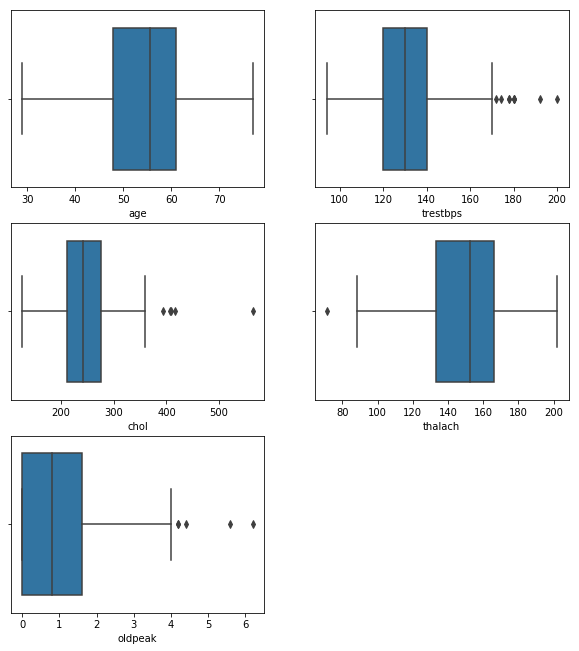

In [16]:
#Plot a boxplot of all the numeric variables
plt.figure(figsize=(10,15))
for i in range(0,5):
  plt.subplot(4,2,i+1)
  sns.boxplot(heart_df[numerical_cols[i]])

Above, the box and whisker plots were used to detect outliers. We can see some outliers in 'trestbps', 'chol', 'thalach', and 'oldpeak'. The next step shows how we handled these outliers

#### Data Pre-processing- Remove Rows With Outliers Outside The Range -3SD &  +3SD

In [17]:
#Here, all datapoints outside the range of -3SD and +3SD were treated as outliers and subsequently removed

##### Removing Outliers from 'trestbps' variable

In [18]:
#Upper limit
upper_limit=heart_df.trestbps.mean() + 3*heart_df.trestbps.std()
upper_limit

184.29283169673522

In [19]:
#Lower limit
lower_limit=heart_df.trestbps.mean() - 3*heart_df.trestbps.std()
lower_limit

78.91246631650985

In [20]:
#Identify outlier(s)
heart_df[(heart_df.trestbps>upper_limit) | (heart_df.trestbps<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [21]:
#To remove these outliers, we specify the condition below
heart_df_no_outlier1=heart_df[(heart_df.trestbps<upper_limit) & (heart_df.trestbps>lower_limit)]
heart_df_no_outlier1.shape

(300, 14)

##### Removing Outliers from 'chol' variable

In [22]:
#Upper limit
upper_limit=heart_df_no_outlier1.chol.mean() + 3*heart_df_no_outlier1.chol.std()
upper_limit

401.7215206948786

In [23]:
#Lower limit
lower_limit=heart_df_no_outlier1.chol.mean() - 3*heart_df_no_outlier1.chol.std()
lower_limit

90.7584793051214

In [24]:
#Identify outlier(s)
heart_df_no_outlier1[(heart_df_no_outlier1.chol>upper_limit) | (heart_df_no_outlier1.chol<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [25]:
#To remove these outliers, we specify the condition below
heart_df_no_outlier2=heart_df_no_outlier1[(heart_df_no_outlier1.chol<upper_limit) & (heart_df_no_outlier1.chol>lower_limit)]
heart_df_no_outlier2.shape

(296, 14)

##### Removing Outliers from 'thalach' variable

In [26]:
#Upper limit
upper_limit=heart_df_no_outlier2.thalach.mean() + 3*heart_df_no_outlier2.thalach.std()
upper_limit

218.2425042633139

In [27]:
#Lower limit
lower_limit=heart_df_no_outlier2.thalach.mean() - 3*heart_df_no_outlier2.thalach.std()
lower_limit

80.54803627722664

In [28]:
#Identify outlier(s)
heart_df_no_outlier2[(heart_df_no_outlier2.thalach>upper_limit) | (heart_df_no_outlier2.thalach<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [29]:
#To remove these outliers, we specify the condition below
heart_df_no_outlier3=heart_df_no_outlier2[(heart_df_no_outlier2.thalach<upper_limit) & (heart_df_no_outlier2.thalach>lower_limit)]
heart_df_no_outlier3.shape

(295, 14)

##### Removing Outliers from 'oldpeak' variable

In [30]:
#Upper limit
upper_limit=heart_df_no_outlier3.oldpeak.mean() + 3*heart_df_no_outlier3.oldpeak.std()
upper_limit

4.461259094907164

In [31]:
#Lower limit
lower_limit=heart_df_no_outlier3.oldpeak.mean() - 3*heart_df_no_outlier3.oldpeak.std()
lower_limit

-2.4158353660936047

In [32]:
#Identify outlier(s)
heart_df_no_outlier3[(heart_df_no_outlier3.oldpeak>upper_limit) | (heart_df_no_outlier3.oldpeak<lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [33]:
#To remove these outliers, we specify the condition below
heart_df_new=heart_df_no_outlier3[(heart_df_no_outlier3.oldpeak<upper_limit) & (heart_df_no_outlier3.oldpeak>lower_limit)]
heart_df_new.shape

(293, 14)

In summary, the number of outliers removed are shown below

In [34]:
print('Number of outliers in the trestbps', 2)
print('Number of outliers in the chol', 4)
print('Number of outliers in the thalach', 1)
print('Number of outliers in the oldpeak', 2)
print("No of rows after removing the outliers", len(heart_df_new))

Number of outliers in the trestbps 2
Number of outliers in the chol 4
Number of outliers in the thalach 1
Number of outliers in the oldpeak 2
No of rows after removing the outliers 293


In total, one duplicated row, and 9 rows containing outliers were removed during the data pre-processing. The number of rows after removing the outliers are 293

In [35]:
heart_df_new.shape

(293, 14)

### B. EXPLORATORY DATA  ANALYSIS & VISUALIZATION

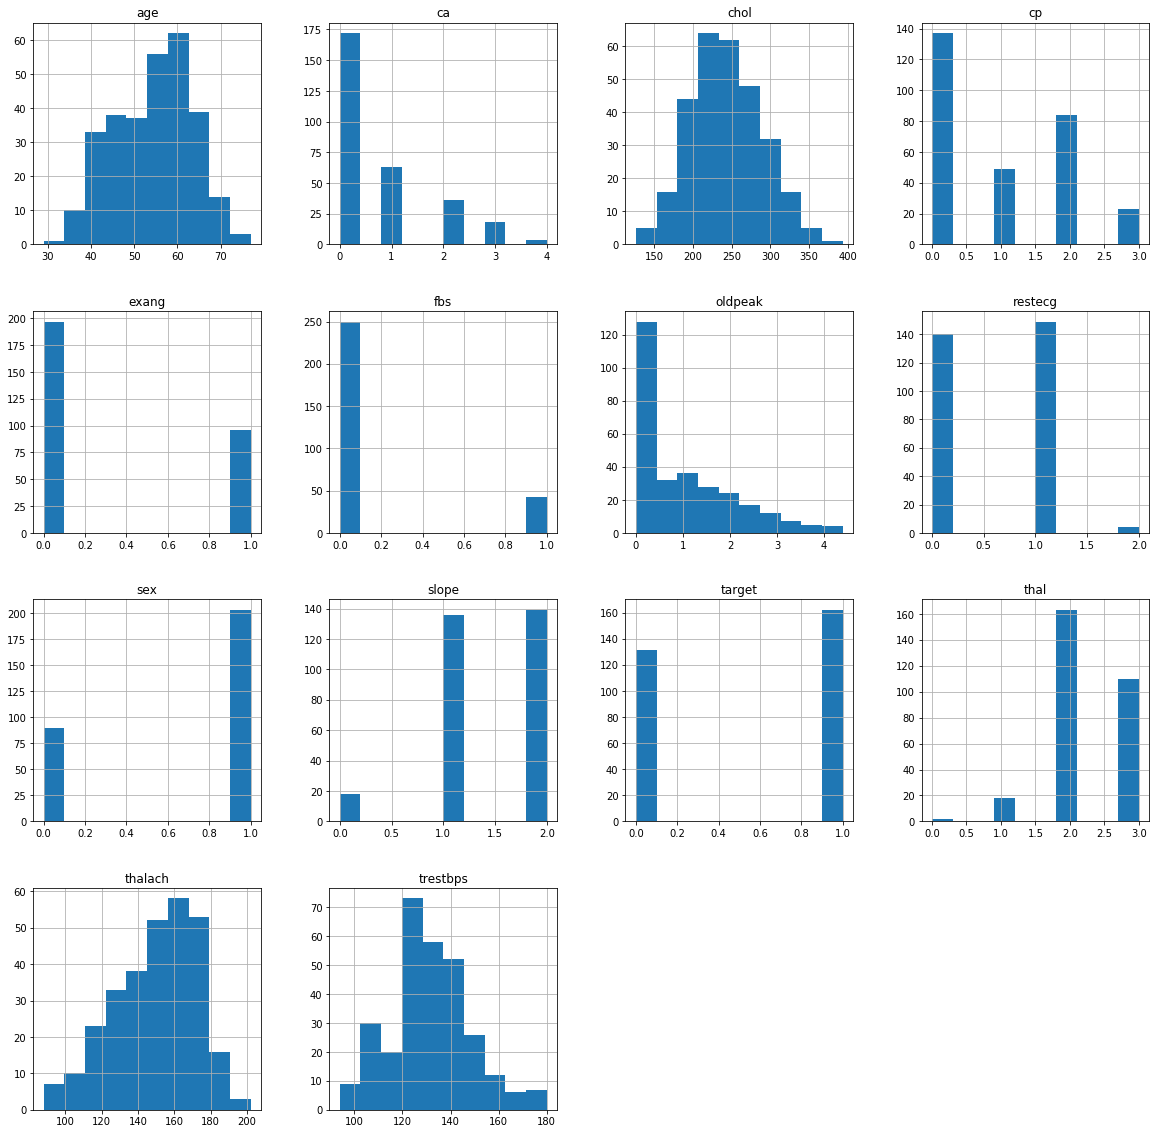

In [36]:
# Plot the histograms of the individual columns for the new dataframe 'heart_df_new'
heart_df_new.hist(figsize=(20,20))
plt.show()

#### Predictors Correlation With The Target Variable

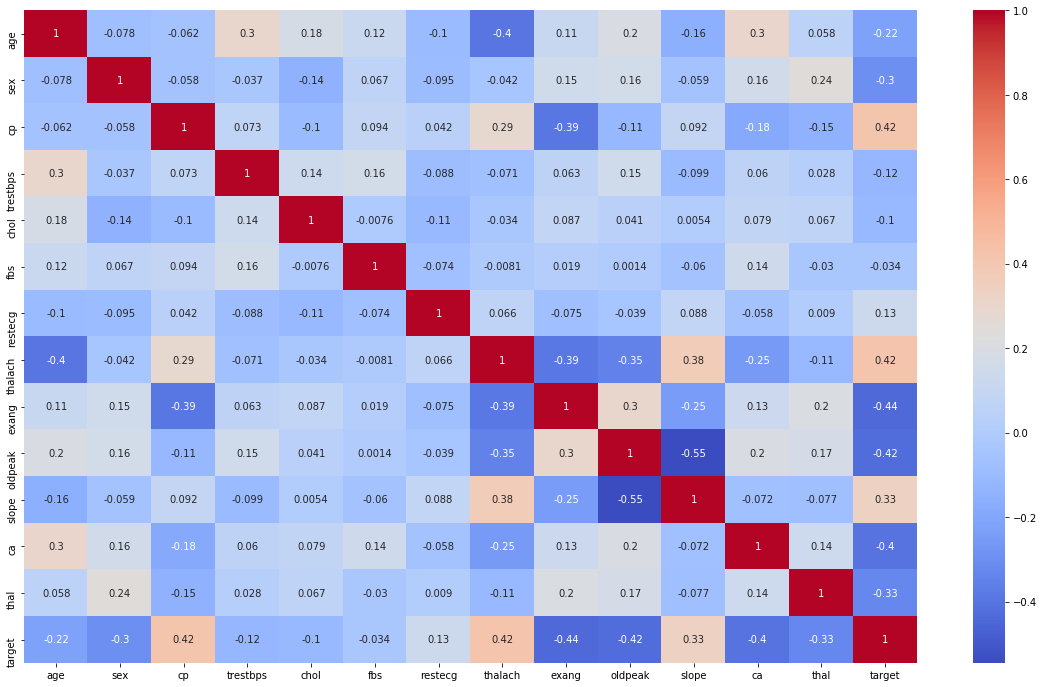

In [37]:
#Checking the correlation of the different attributes (predictors) against the target variable (response)
cor=heart_df_new.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

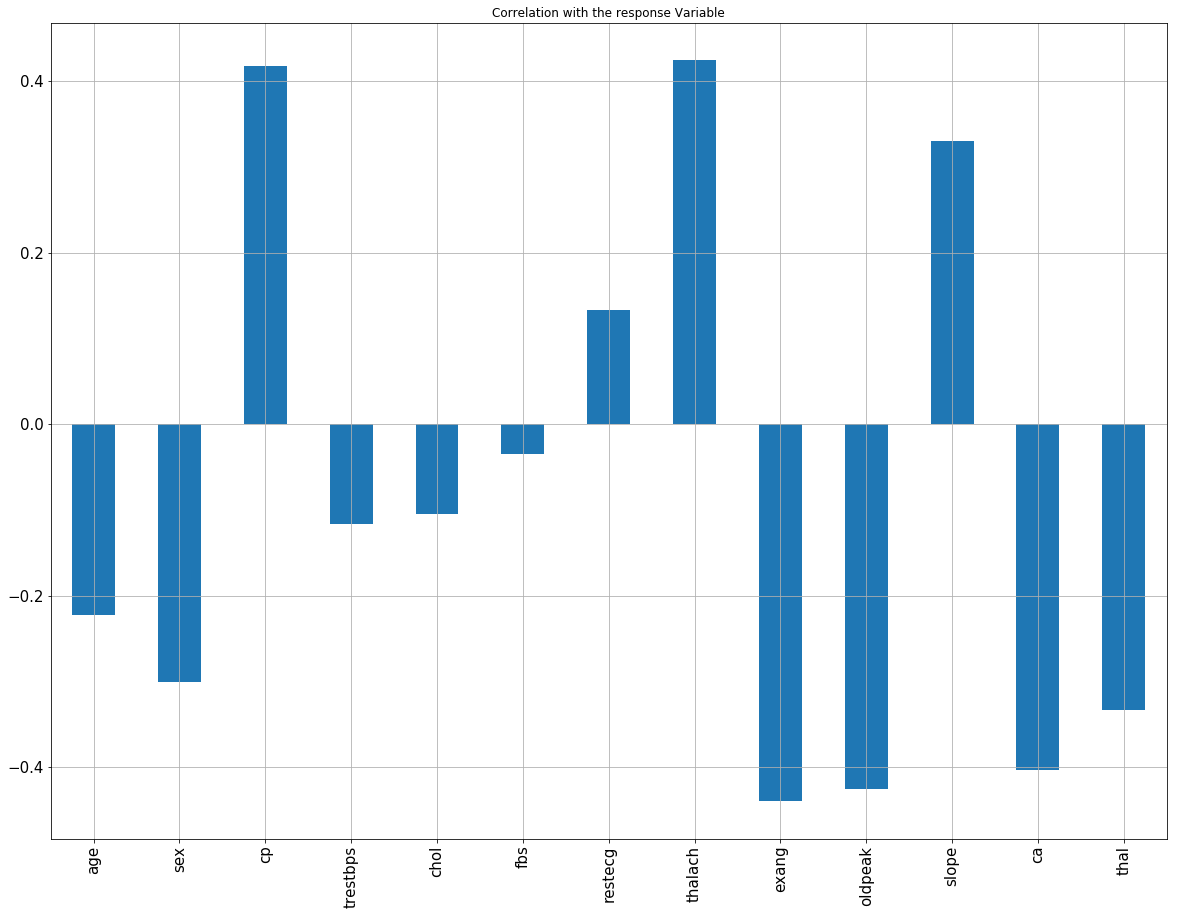

In [38]:
heart_df_new.drop('target', axis=1).corrwith(heart_df_new.target).plot.bar(figsize=(20,15), 
                                              title="Correlation with the response Variable", 
                                              fontsize=15, rot=90, grid=True)

'fbs' and 'chol' are the lowest correlated with the target variable. All other variables have a significant correlation with the target variable.

In [39]:
#Total number of patients who are susceptible to heart attack (1) or not (0)
heart_df_new.target.value_counts()

1    162
0    131
Name: target, dtype: int64

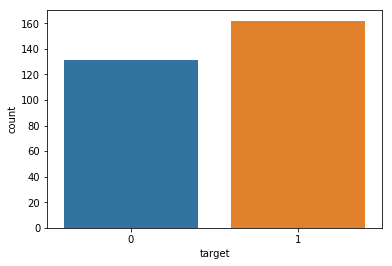

In [40]:
#Plot of value counts
sns.countplot(x='target',data=heart_df_new)

From the plot above, we see that there are 131 patients with no heart attack and 162 patients who are susceptible to heart attack.


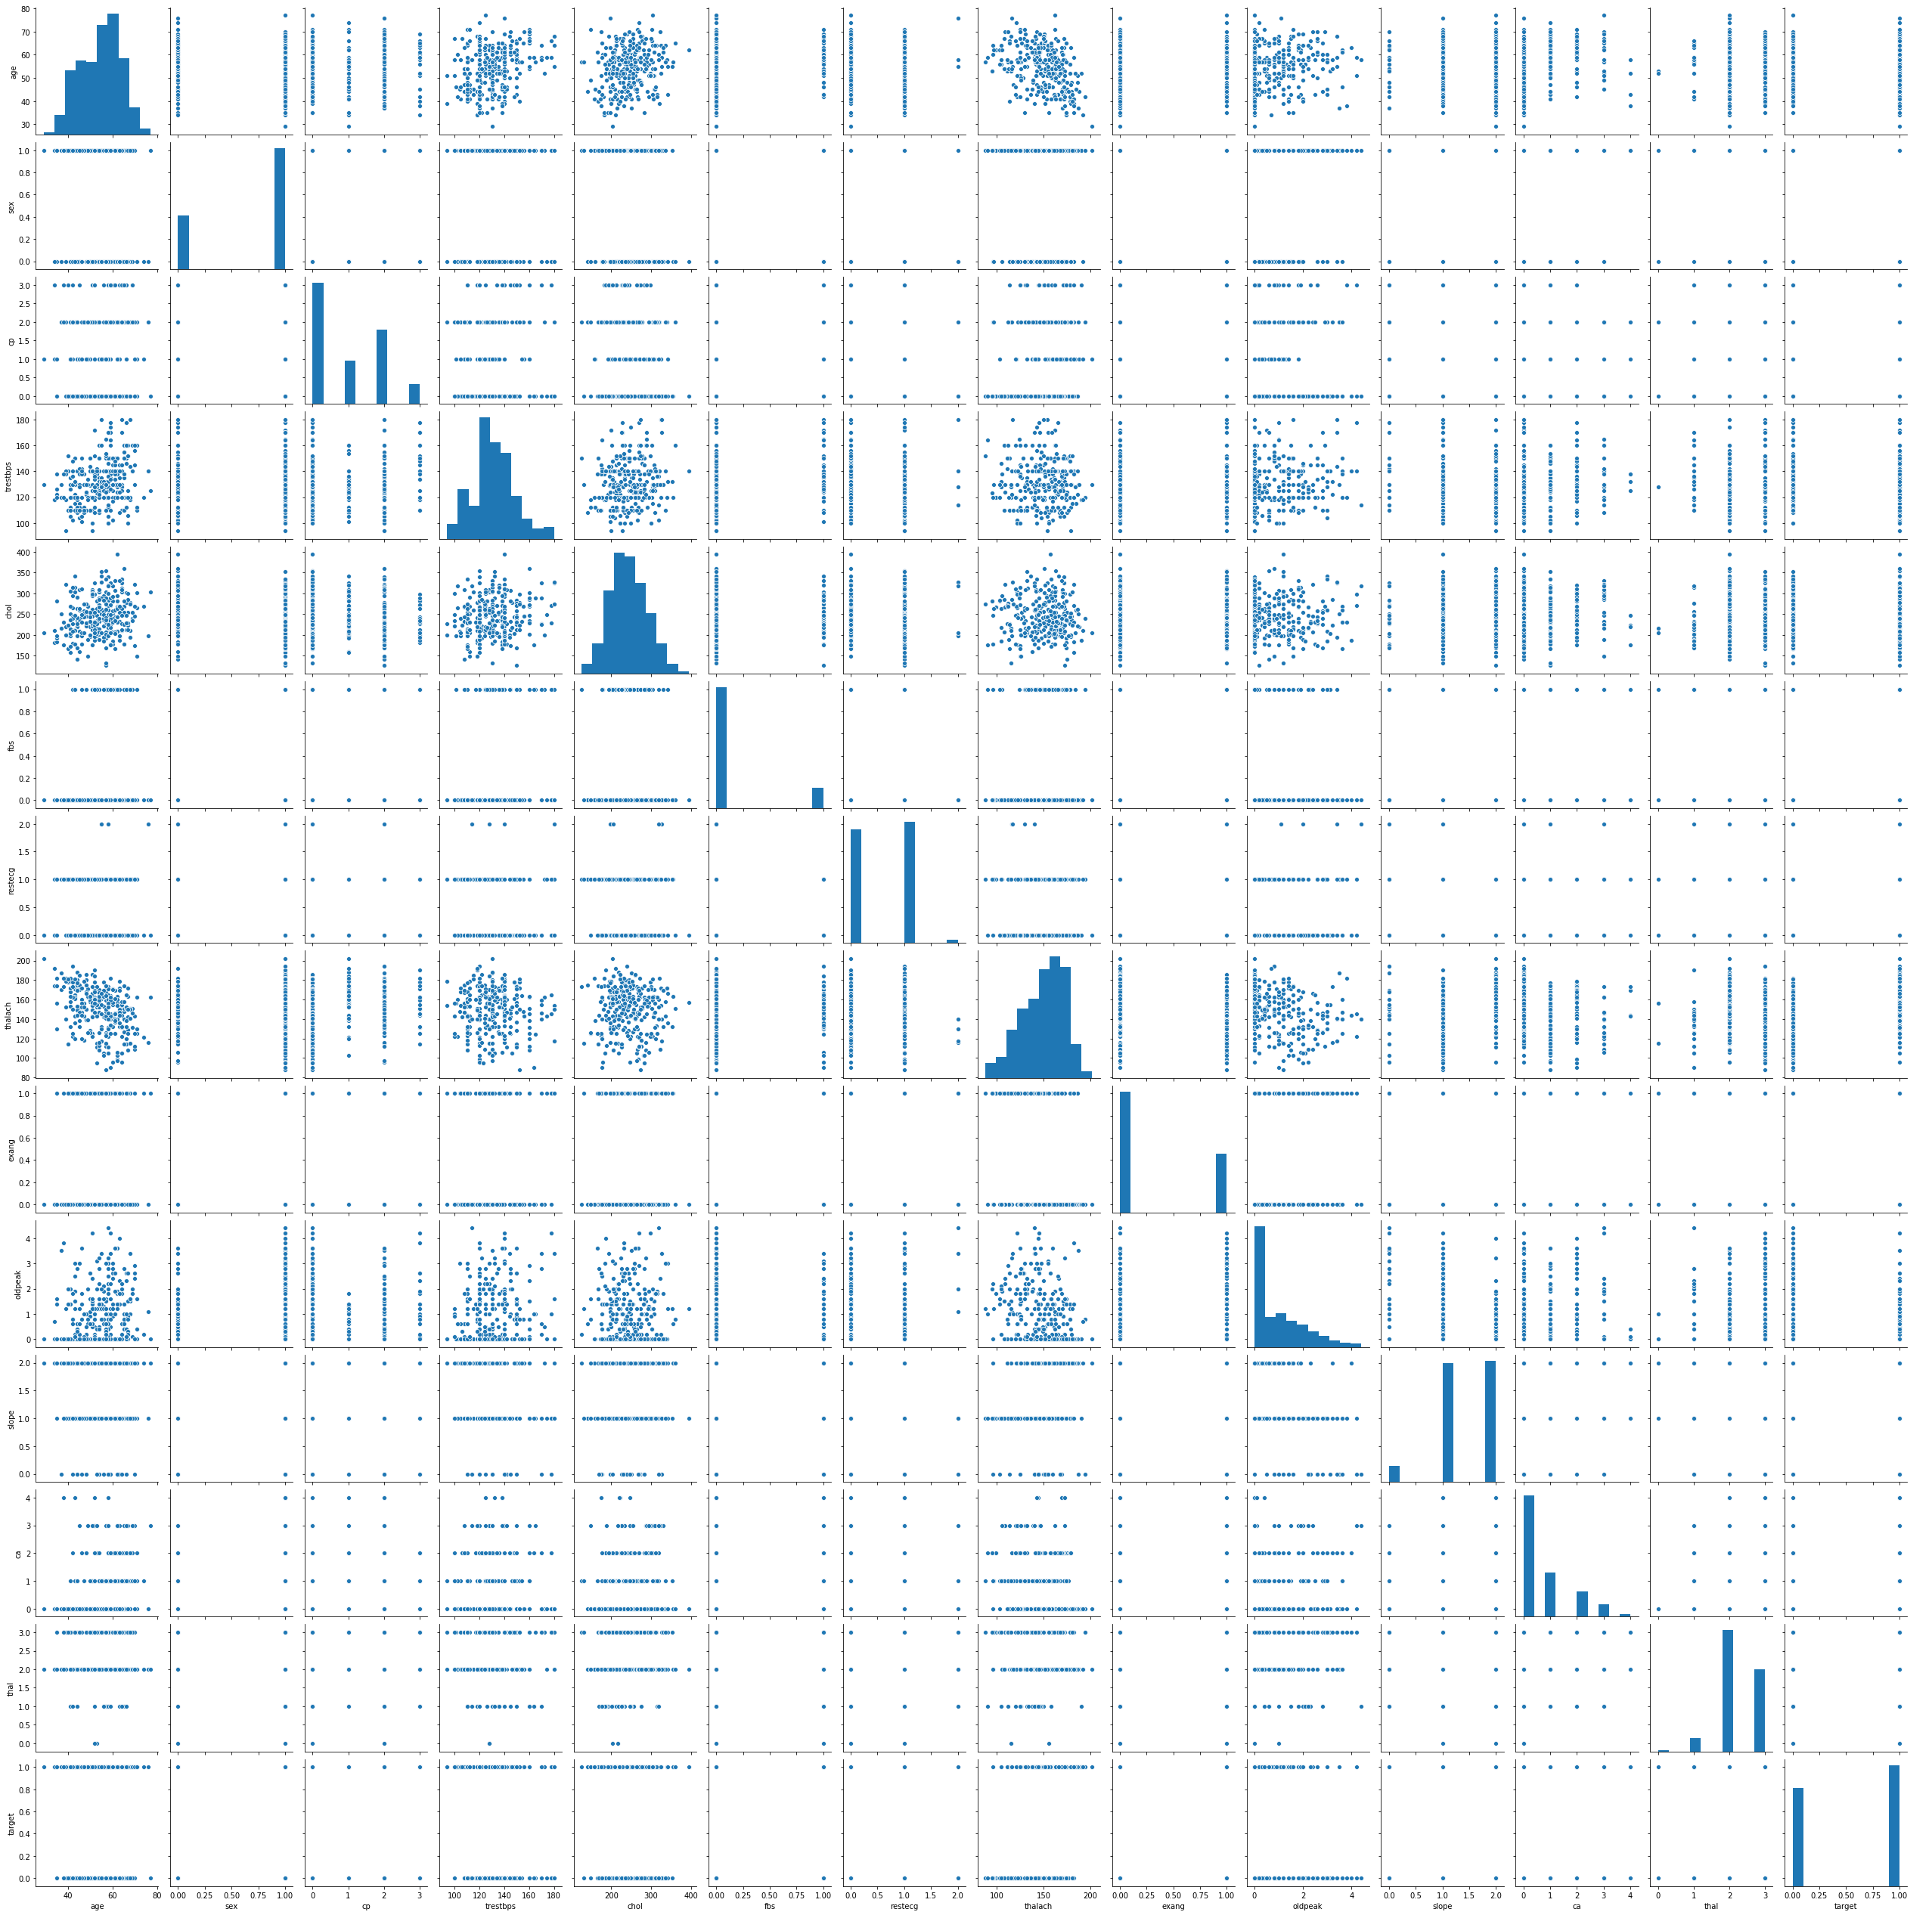

In [41]:
#Pairplot of all attributes considered for heart attack prediction in patients
sns.pairplot(data=heart_df_new)

#### Analysis of  the Individual Features

#### 1. Age

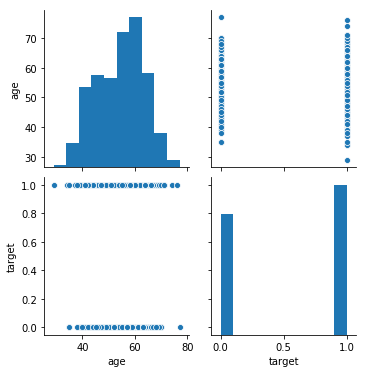

In [42]:
 sns.pairplot(data=heart_df_new, vars = ['age','target'])

In [43]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [44]:
col='age'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="blue"),mode='lines+markers')
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="red"),mode='lines+markers')
data = [trace1, trace2]
layout={'title':"Target With Respect to age",'xaxis':{'title':"Age"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

Patients between the ages of 40-65yrs are at a high-risk window for heart attack.

#### 2. Sex

In [45]:
df1=pd.DataFrame(heart_df_new.groupby('sex')['target'].mean().reset_index().values,
                    columns=["gender","target1"])
df1.head()

,gender,target1
0,0.0,0.777778
1,1.0,0.453202


Text(0.5,1,'Bar Chart for Sex Result')

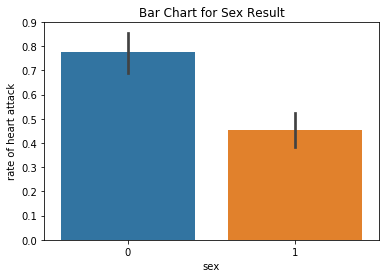

In [46]:
sns.barplot(heart_df_new.sex,heart_df_new.target)
plt.ylabel('rate of heart attack')
plt.title('Bar Chart for Sex Result')

The rate of heart attack in females is 75% and in males is 45%.

#### 3. Chest Pain (cp)

In [47]:
col = "cp"
grouped = heart_df_new[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': '0: typical angina, 1: atypical angina,2: non-anginal pain,3: asymptomatic'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)


Text(0.5,1,'Bar Chart for Chest Pain Result')

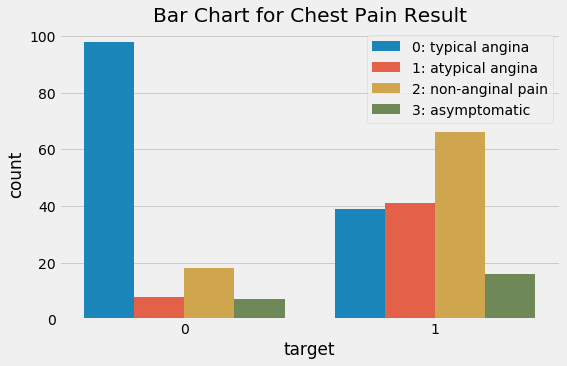

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.countplot(x=heart_df_new.target,hue=heart_df_new.cp)
plt.legend(labels=['0: typical angina', '1: atypical angina','2: non-anginal pain','3: asymptomatic'])
plt.title('Bar Chart for Chest Pain Result')

27.2% patients have chest pain type 0;
82% have chest pain type 1;
79.3% have chest pain type 2;
69.5% have chest pain type 3. 

From the above plot we observe that chest pain type 1 and chest pain type 2 are more likely to induce heart disease.

#### 4. Resting Blood Pressure (trestbps)


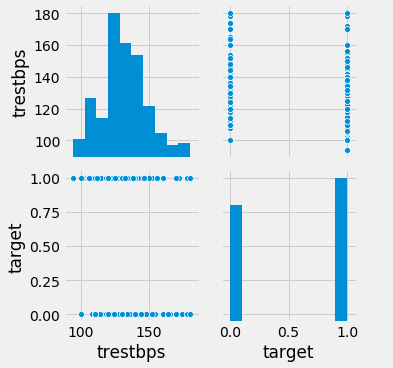

In [49]:
sns.pairplot(data=heart_df_new, vars = ['trestbps','target'])

In [50]:
col='trestbps'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="blue"),mode='lines+markers')
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="red"),mode='lines+markers')
data = [trace1, trace2]
layout={'title':"Target With Respect to Resting Blood Pressure",'xaxis':{'title':"Resting Blood Pressure"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

Patients who have resting blood pressure among 120 to 150 have a higher risk of getting heart attack.

#### 5. cholesterol measurement in mg/dl (chol)

In [51]:
col='chol'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="blue"),mode='lines+markers')
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="red"),mode='lines+markers')
data = [trace1, trace2]
layout={'title':"Target With Respect to Cholesterol level",'xaxis':{'title':"Cholesterol Level"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

Cholesterol level among 200 to around 275 gives a high possibility of heart attack.

#### 6. Fasting Blood Sugar (fbs)

In [52]:
col='fbs'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name=0, marker=dict(color="#a678de"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name=1, marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout={'title':"target over the person's fasting blood sugar ",'xaxis':{'title':"fbs(> 120 mg/dl, 1 = true; 0 = false)"}}
#layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
iplot(fig)

   fbs   target3
0  0.0  0.560000
1  1.0  0.511628


Text(0.5,1,'Bar Chart for Fasting Blood Sugar Result')

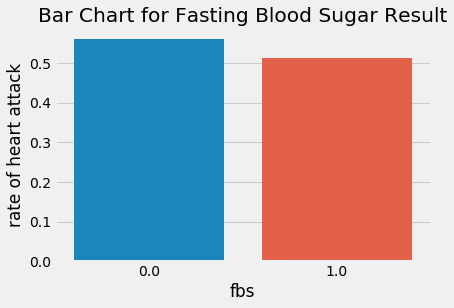

In [53]:
dy=pd.DataFrame(heart_df_new.groupby('fbs')['target'].mean().reset_index().values,
                    columns=["fbs","target3"])
print(dy.head())
sns.barplot(dy.fbs,dy.target3)
plt.ylabel('rate of heart attack')
plt.title('Bar Chart for Fasting Blood Sugar Result')

51.2% of patients have the fasting blood sugar rate over 120 mg/dl, while 55% of patients having the fasting blood sugar rate below 120 mg/dl are likely to have a heart attack

#### 7. Resting electrocardiographic measurement (restecg)

In [54]:
col = "restecg"
grouped = heart_df_new[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': '0: normal, 1: having ST-T wave abnormality,2: showing probable or definite left ventricular hypertrophy by Estes criteria'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)


Text(0.5,1,'Bar Chart for Resting Electrocardiographic Measurement Result')

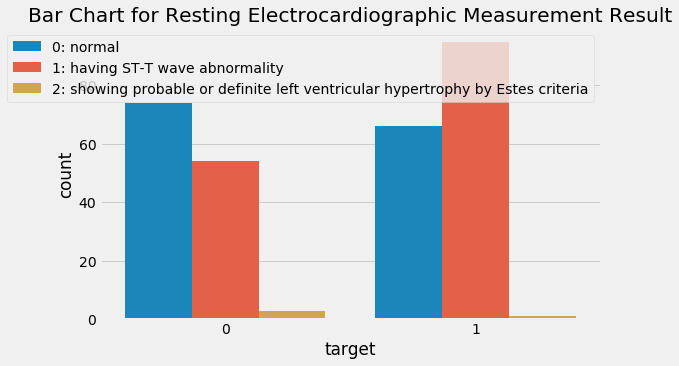

In [55]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.countplot(x=heart_df_new.target,hue=heart_df_new.restecg)
plt.legend(labels=['0: normal', '1: having ST-T wave abnormality', 
                   '2: showing probable or definite left ventricular hypertrophy by Estes criteria'])
plt.title('Bar Chart for Resting Electrocardiographic Measurement Result')


Having ST-T wave abnormality is the most contributing factor to a heart attack.

#### 8. Maximum heart rate (thalach)

In [56]:
col='thalach'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="blue"),mode='lines+markers')
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="red"),mode='lines+markers')
data = [trace1, trace2]
layout={'title':"Target With Respect to maximum heart rate",'xaxis':{'title':"Maximum heart rate"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

Heart rate higher than 140 started showing higher possibility of heart attack.

#### 9. Exercise Induced Angina (exang) 

In [57]:
df2=pd.DataFrame(heart_df_new.groupby('exang')['target'].mean().reset_index().values,
                    columns=["exercise","target2"])
df2.head()

,exercise,target2
0,0.0,0.705584
1,1.0,0.239583


Text(0.5,1,'0=No, 1=Yes')

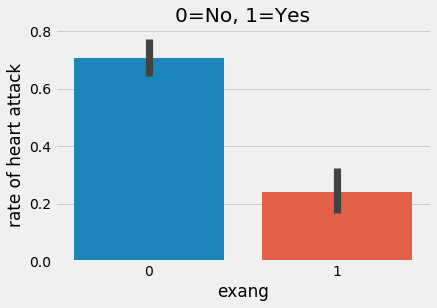

In [58]:
sns.barplot(heart_df_new.exang,heart_df_new.target)
plt.ylabel('rate of heart attack')
plt.title('0=No, 1=Yes')

The rate of heart attack for exercise is 70% and no exercise angina is 23%.

#### 10. Exercise induced depression (oldpeak)

In [59]:
df3=pd.DataFrame(heart_df_new.groupby('oldpeak')['target'].mean().reset_index().values,
                    columns=["oldpeak","target3"])
df3.head()

,oldpeak,target3
0,0.0,0.752577
1,0.1,0.571429
2,0.2,0.750000
3,0.3,0.666667
4,0.4,0.888889


In [60]:
col='oldpeak'
d1=heart_df_new[heart_df_new['target']==0]
d2=heart_df_new[heart_df_new['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name=0, marker=dict(color="blue"),mode='lines+markers')
trace2 = go.Scatter(x=v2[col], y=v2["count"], name=1, marker=dict(color="red"),mode='lines+markers')
data = [trace1, trace2]
layout={'title':"Target With Respect to exercise induced depression",'xaxis':{'title':"Exercise induced depression"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

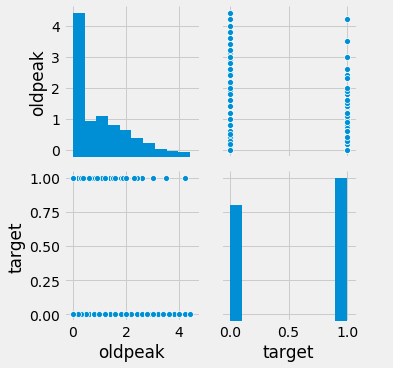

In [61]:
sns.pairplot(data=heart_df_new, vars = ['oldpeak','target'])

Exercise induced depression has a strong negative relationship with heart attack. From the plot, we see that a very low or no exercise induced depression increases the risk of patients having a heart attack

#### 11. The slope of the peak exercise ST segment (slope)

In [62]:
df4=pd.DataFrame(heart_df_new.groupby('slope')['target'].mean().reset_index().values,
                    columns=["slope","target4"])
df4.head()

,slope,target4
0,0.0,0.500000
1,1.0,0.352941
2,2.0,0.755396


Text(0.5,1,'0: upsloping, 1: flat, 2: downsloping')

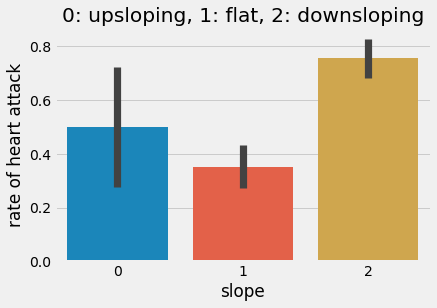

In [63]:
sns.barplot(heart_df_new.slope,heart_df_new.target)
plt.ylabel('rate of heart attack')
plt.title('0: upsloping, 1: flat, 2: downsloping')

Downsloping can trigger a heart attack greatly amongst the other slopes

#### 12. The number of major vessels (ca)

In [64]:
categorical_cols = ['ca']

In [65]:
# Plotting Categorical Variable (Ca)

df['ca'] had 0-3 values according to the description ca in the dataset,but on checking for unique values it had 0-4 values

In [66]:
#Checking for Categorical Data-CA
y=heart_df_new['ca']
y.value_counts()

0    172
1     63
2     36
3     18
4      4
Name: ca, dtype: int64

Assuming it was an error with the dataset, this was corrected by replacing all the value of 4, with 0 in the 'ca' rows

C:\Users\14034\Downloads\ANACONDA\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\14034\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0.5,1,'Bar Chart for The Number of Major Vessels Colored by Flourosopy')

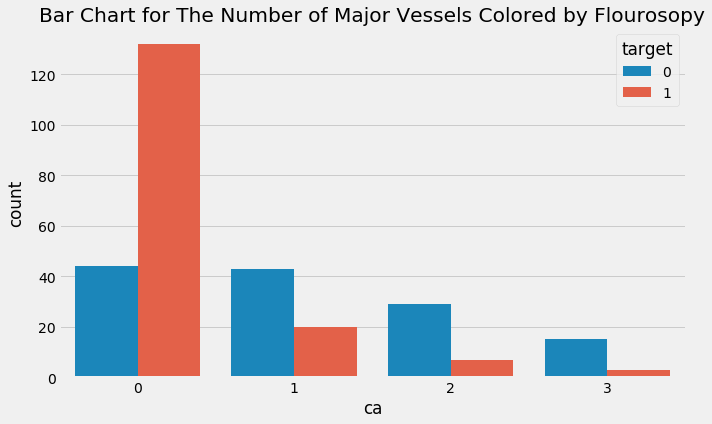

In [67]:
heart_df_new['ca'].loc[heart_df_new['ca'] == 4] = 0
plt.figure(figsize=(10,6))
sns.countplot(heart_df_new['ca'], hue ='target', data = heart_df_new)
plt.title('Bar Chart for The Number of Major Vessels Colored by Flourosopy')

In [68]:
cross_ca = pd.crosstab(heart_df_new['ca'],heart_df_new['target'])
print(cross_ca)

target   0    1
ca             
0       44  132
1       43   20
2       29    7
3       15    3


We can also see that the frequency of heart attack possibility depends a great deal on the number of vessels colored by flourosopy (ca). As seen on the plot above, patients with  ca equal to '0' are more likely to have a heart disease/attack, and the least patients at risk being ca '3'

#### 13. Thalassemia (thal)

df['thal'] had 3 values according to the description thal: 0 = normal; 1 = fixed defect; 2 = reversable defect ,but on checking for unique values it had 4 values

In [69]:
#Checking for Categorical Data-THAL
x=heart_df_new['thal']
x.value_counts()

2    163
3    110
1     18
0      2
Name: thal, dtype: int64

Assuming it was an error with the dataset, this was corrected by substracting 1 from each row of that column

C:\Users\14034\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



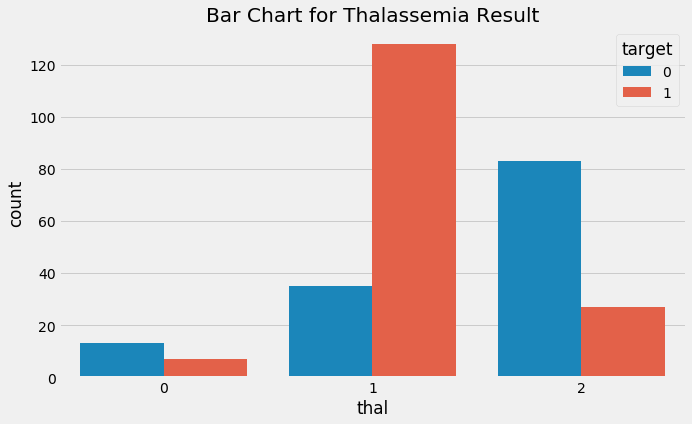

In [70]:
heart_df_new['thal'].loc[(heart_df_new['thal'] != 0) & (len(heart_df_new['thal'].unique()) == 4)] -=1
plt.figure(figsize=(10,6))
sns.countplot(heart_df_new['thal'], hue ='target', data = heart_df_new)
plt.title('Bar Chart for Thalassemia Result')
plt.savefig("thal.png") 

In [71]:
cross_thal = pd.crosstab(heart_df_new['thal'],heart_df_new['target'])
print(cross_thal)

target   0    1
thal           
0       13    7
1       35  128
2       83   27


We can also see that the frequency of heart attack possibility depends a great deal on thalassemia (thal) as well. From the plot above, we see that patients with 'thal' value equal to 1 (fixed defect) are more likely to have heart disease. Thus, this is a good predictor of the outcome variable (i.e. probability of a heart attack)

### C.  DATA MODELING

#### Perform Logistic Regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. The target variable is binary. We shall this technique for prediction and also calculate the probability of success.

In [72]:
# Fit the model
predictors = ['age', 'ca', 'chol', 'cp', 'exang', 'fbs', 'oldpeak', 'restecg', 'sex', 'slope', 'thal', 'thalach', 'trestbps']
m = Logit(heart_df_new['target'], heart_df_new[predictors])
m = m.fit()

Optimization terminated successfully.
         Current function value: 0.336154
         Iterations 7


In [73]:
# Results of regression parameters
m.params

age         0.022335
ca         -1.269465
chol       -0.004801
cp          0.791208
exang      -0.938930
fbs         0.258227
oldpeak    -0.403596
restecg     0.404731
sex        -1.683197
slope       0.774306
thal       -0.959617
thalach     0.028950
trestbps   -0.018630
dtype: float64

In [74]:
# Model summary
print(m.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.511     
Dependent Variable: target           AIC:              222.9864  
Date:               2020-08-10 19:05 BIC:              270.8286  
No. Observations:   293              Log-Likelihood:   -98.493   
Df Model:           12               LL-Null:          -201.45   
Df Residuals:       280              LLR p-value:      1.9601e-37
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0223    0.0207   1.0813  0.2796  -0.0181   0.0628
ca            -1.2695    0.2713  -4.6783  0.0000  -1.8013  -0.7376
chol          -0.0048    0.0044  -1.0931  0.2744  -0.0134   0.0038
cp             0.7912    0.190

The summary above shows 13 attributes with p-values higher than 5% (significant level), thereby showing low
or no statistical significant relationship with the probability of a heart attack in these patients. Hence, backward elimination approach is applied to remove features with p values greater than 5%. See below

#### Feature Selection: Backward elemination (P-value approach)

In [75]:
# Remove variables with p-value > 5%
heart_df_new2=heart_df_new.drop(['fbs', 'restecg', 'oldpeak', 'age', 'trestbps', 'chol'], axis=1)
heart_df_new2.head()

,sex,cp,thalach,exang,slope,ca,thal,target
0,1,3,150,0,0,0,0,1
1,1,2,187,0,0,0,1,1
2,0,1,172,0,2,0,1,1
3,1,1,178,0,2,0,1,1
4,0,0,163,1,2,0,1,1


In [76]:
heart_df_new2.shape

(293, 8)

In [77]:
# Re-Fit the model
predictors2=['sex', 'cp', 'exang', 'ca', 'thal', 'thalach', 'slope'] 
m2=Logit(heart_df_new2['target'],heart_df_new2[predictors2])
m_new=m2.fit()

Optimization terminated successfully.
         Current function value: 0.359340
         Iterations 7


In [78]:
# New Model summary
print(m_new.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.477     
Dependent Variable: target           AIC:              224.5731  
Date:               2020-08-10 19:05 BIC:              250.3343  
No. Observations:   293              Log-Likelihood:   -105.29   
Df Model:           6                LL-Null:          -201.45   
Df Residuals:       286              LLR p-value:      8.1498e-39
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
sex       -1.5892     0.4235   -3.7526   0.0002   -2.4192   -0.7592
cp         0.6954     0.1766    3.9369   0.0001    0.3492    1.0416
exang     -1.3122     0.3712   -3.5353   0.0004   -2.0397   -0.5847
ca        -1.3126     0.

From the summary table above, we can see that there is a strong evidence to prove that the features highlighted in the table all have a strong positive (cp,thalach,slope) and negative (sex,exang,thal,ca) associations with the target variable.This means that these features can be used to predict whether or not a patient is at risk of possible heart attack.

In [79]:
# Results of regression parameters of new model
m_new.params

sex       -1.589207
cp         0.695368
exang     -1.312182
ca        -1.312623
thal      -1.046865
thalach    0.011908
slope      1.067587
dtype: float64

In [80]:
heart_df_new2.shape

(293, 8)

In [81]:
# Derive the estimates of the odds
heart_df_new2.loc[:, 'p'] = m_new.predict(heart_df_new2[predictors2])
heart_df_new2.head()

,sex,cp,thalach,exang,slope,ca,thal,target,p
0,1,3,150,0,0,0,0,1,0.907473
1,1,2,187,0,0,0,1,1,0.727414
2,0,1,172,0,2,0,1,1,0.978792
3,1,1,178,0,2,0,1,1,0.910044
4,0,0,163,1,2,0,1,1,0.847768


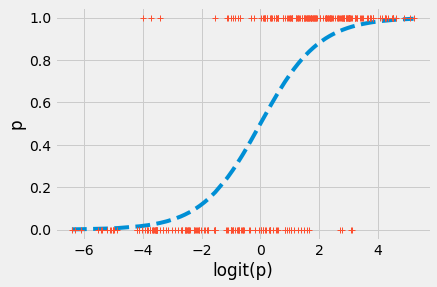

In [82]:
# Plot the relationship between the values of logit(p) and odds (p) along the actual values of the response (target)
heart_df_new2 = heart_df_new2.sort_values(by = ['p'], axis = 0)
plt.plot(logit(heart_df_new2.p), heart_df_new2.p, '--')
plt.plot(logit(heart_df_new2.p), heart_df_new2.target, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

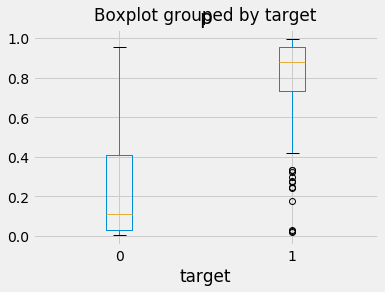

In [83]:
# Plot the boxplot to see the distribution of the estimated odds for the both value of the actual response
heart_df_new2.boxplot(column='p', by = 'target')
plt.show()

In [84]:
# Derive the binary estimates  𝑦̂   of the response  𝑦 
heart_df_new2.loc[:, 'yhat'] = (heart_df_new2.p > 0.5) * 1
heart_df_new2.yhat.value_counts()

1    178
0    115
Name: yhat, dtype: int64

#### Evaluation of the Logistic Regression Model

Next, we shall evaluate the logistic regression model using the pseudo r-squared, statistical accuracy, MCC, precision, recall, specificity, f-score, confusion matrix, Receiver Operating Characteristic (ROC) and Area Under Curve (AUC)

##### Model Evaluation- Confusion Matrix

In [85]:
# Create confusion matrix to see how well the estimates match the actual values
pd.crosstab(heart_df_new2.target, heart_df_new2.yhat)

yhat,0,1
target,,
0,101,30
1,14,148


In [86]:
# Evaluate the logistic regression model using the statistical accuracy, MCC, precision, recall, etc

# Begin with the confusion matrix
conf_mat = m_new.pred_table()
print (conf_mat)

[[101.  30.]
 [ 14. 148.]]


From the confusion matrix above, we see the following

#The confusion matrix shows 101+148=249 correct predictions and 14+30=44 incorrect ones

#True Positives: 148

#True Negatives: 101

#False Positives: 30 (Type 1 error)

#False Negatives: 14 (Type 2 error)

##### Model Evaluation- Statistics

Next, we shall extract the TP,FP,FB and TP. Furthermore, we shall calculate Accuracy, MCC, Precision, Specificity and F-Score

In [87]:
# Extract the TP, FP, FN and TP
tn, fp, fn, tp = conf_mat.flatten()
print (tn, fp, fn, tp)

101.0 30.0 14.0 148.0


In [88]:
# Calculate the accuracy, MCC, etc
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model is: %1.2f" % acc)

Accuraccy of the model is: 0.85


In [89]:
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)

Mathews correlation coefficient between the estimates and the true response is: 0.70


In [90]:
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Model's precision is 0.83 and it's recall is 0.91


In [91]:
f_score = 2*((prc*rec)/(prc + rec))
print ("Model's f-score is: %1.2f" % f_score)

Model's f-score is: 0.87


In [92]:
specificity = tn/(tn+fp) #True Negative Rate
print ("Model's specificity is: %1.2f" % specificity)

Model's specificity is: 0.77


In [93]:
sensitivity = tp/(tp+fn) #True Positive Rate
print ("Model's sensitivity is: %1.2f" % sensitivity)

Model's sensitivity is: 0.91


From the above statistics it is clear that the model is more sensitive than specific. The positive values are predicted more accurately than the negatives.

##### Model Evaluation- ROC and AUROC

First, we shall generate the ROC curve. For the set of pre-specified discrimination threshold of 0.5, we will calculate sensitivity and specificity (i.e predicting the probabilities of 0 (No heart attack) and 1 (Heart attack) with a default classification threshold of 0.5

We will also calculate the accuracy and MCC which we will use in the following exercise.

In [94]:
# Set discrimination thresholds
ths = np.arange(0., 1.0, 0.025)

# Containers
sensitivity = []
specificity = []
accuracy = []
matthews = []

# Main loop
for th in ths:
    # Generate estimates
    conf_mat = m.pred_table(threshold=th)
    
    # Extract TN, FP, ...
    tn, fp, fn, tp = conf_mat.flatten()
    
    # Calculate sensitivity and specificity
    sens = (1. * tp) / (tp + fn)
    spec = (1. * tn) / (tn + fp)    
    
    # Calculate ACC and MCC
    acc = (tp + tn) / np.sum(conf_mat)
    mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))    

    # Add to containers
    sensitivity.append(sens)
    specificity.append(spec)
    accuracy.append(acc)
    matthews.append(mcc)

C:\Users\14034\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning:

invalid value encountered in double_scalars



In [95]:
# Bind all the numbers together
roc = pd.DataFrame({'discret_thr' : ths, 
                    'sensitivity' : sensitivity, 
                    'specificity' : specificity,
                    '_specificity' : [1 - x for x in specificity],
                    'accuracy' : accuracy, 
                    'matthews' : matthews})

# Sort by 1 - specificity so we can plot it easily
roc = roc.sort_values(by = "_specificity")

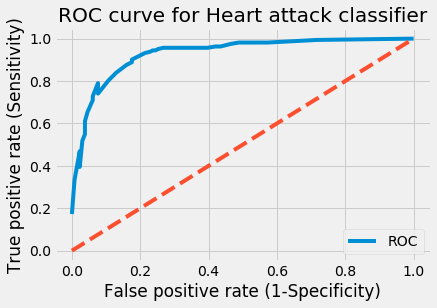

In [96]:
# Plot the ROC curve

plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')
plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.legend(loc = 4)
plt.title('ROC curve for Heart attack classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

The curve above shows the plot of True positive Rate against False Positive Rate. Ideally, we want to have a model that predicts lesser False Positives and more True Positives. For instance, if we choose a solution to accept a 20% False Positive Rate, we get a total of almost 90% True Positives.

To Calculate The AUC

In [97]:
# We will calculate the AUC, by integrating the sensitivity as a function of 1 - specificity

auc = np.trapz(y = roc.sensitivity, x = roc._specificity)
print ("Area under ROC curve = %1.2f" % auc)

Area under ROC curve = 0.93


The area under the ROC curve quantifies model classification accuracy; An area of 1 is ideal. The closer the AUC to 1 the better. Our model's AUC is 0.92, which is a good one

In [98]:
# Identify the threshold corresponding to the balanced sensitivity and specificity as well as the threshold corresponding to the balanced specificity and sensitivity

# Where threshold equal 0.5
idx_default_th = np.where(roc.discret_thr == 0.5)[0][0]

# Max sum of spec and sens
idx_youdensj = np.argmax(roc.sensitivity + roc.specificity)

 # Ballanced spec and sens
idx_ballance = np.argmin(np.abs(roc.sensitivity - roc.specificity))

C:\Users\14034\Downloads\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.

C:\Users\14034\Downloads\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning:


The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.



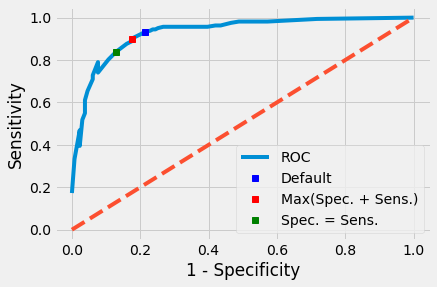

In [99]:
# Highlight the point corresponding to the selected thresholds within the ROC curve

plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')

plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.plot(roc._specificity[idx_default_th], 
         roc.sensitivity[idx_default_th], 
         's', color = 'blue',
         label = 'Default')

plt.plot(roc._specificity[idx_youdensj], 
         roc.sensitivity[idx_youdensj], 
         's', color = 'red',
         label = 'Max(Spec. + Sens.)')

plt.plot(roc._specificity[idx_ballance], 
         roc.sensitivity[idx_ballance], 
         's', color = 'green', 
         label = 'Spec. = Sens.')


plt.legend(loc = 4)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()


Take a look at the confusion matrix at different points of the ROC curve.

In [100]:
m_new.pred_table(threshold=roc.discret_thr[idx_youdensj])

array([[108.,  23.],
       [ 22., 140.]])

The classifier made a total of 293 predictions (i.e, 293 patients for the heart attack). Out of those 293 patients, the classifier predicted that 163 patients are susceptible to heart attack, and 130 patients are not. But in reality, 162 patients are susceptible to heart attack, and 131 patients are not.

In [101]:
m_new.pred_table(threshold=roc.discret_thr[idx_ballance])

array([[115.,  16.],
       [ 34., 128.]])

Finally we can calculate the Youden's J

In [102]:
J = max(roc.sensitivity + roc.specificity - 1)
print ('Youden\'s J = %1.2f' % J)

Youden's J = 0.73


#### Setting the discrimination threshold

In [103]:
# Take a look at the mean of the predicted odds of the model and compare it to the mean of the actual response
print ('Odds mean: %1.2f' % np.mean(heart_df_new2['p']))
print ('Response mean: %1.2f' % np.mean(heart_df_new2['target']))

Odds mean: 0.56
Response mean: 0.55


In [104]:
# Compare the number of predicted and true positives
print ('Predicted positives #: %i' % np.sum(heart_df_new2['p'] > 0.5))
print ('True positives #: %i' % np.sum(heart_df_new2['target'] > 0.5))

Predicted positives #: 178
True positives #: 162


In [105]:
# Or take another look at the confusion matrix
print (conf_mat)

[[131.   0.]
 [134.  28.]]


In [106]:
# Predicted negatives and positives
conf_mat.sum(axis = 0)

array([265.,  28.])

In [107]:
# Actual negatives and positives
conf_mat.sum(axis = 1)

array([131., 162.])

Model's accuracy is 0.87 at an optimal threshold of 0.58


C:\Users\14034\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



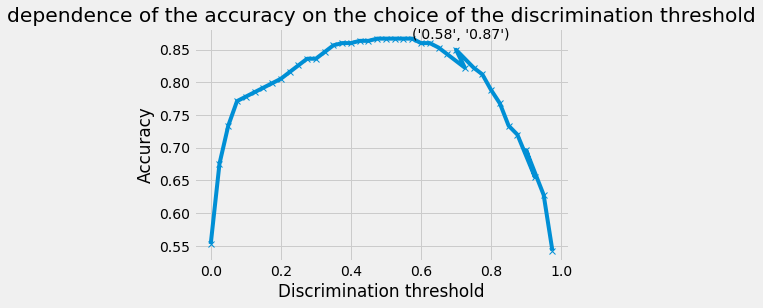

In [108]:
# Plot the dependence of the accuracy and MCC on the choice of the discrimination threshold
import pylab #let you draw text onto your image

#Annotate
max_y = max(roc.accuracy)  # Find the maximum y value
max_Y=f'{max_y:.2}'
max_x = roc.discret_thr[roc.accuracy.argmax()]  # Find the x value corresponding to the maximum y value
max_X=f'{max_x:.2}'
print("Model's accuracy is %1.2f at an optimal threshold of %1.2f" % (max_y, max_x))
a=pylab.text(max_x, max_y, str((max_X, max_Y)))

#Plot
plt.title('dependence of the accuracy on the choice of the discrimination threshold')
plt.plot(roc.discret_thr, roc.accuracy, 'x-')
plt.xlabel('Discrimination threshold')
plt.ylabel('Accuracy')
plt.show()

From the above plot, we see that point where the obtained accuracy reach the maximum is 87%

Model's MCC is 0.73 at an optimal threshold of 0.48


C:\Users\14034\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



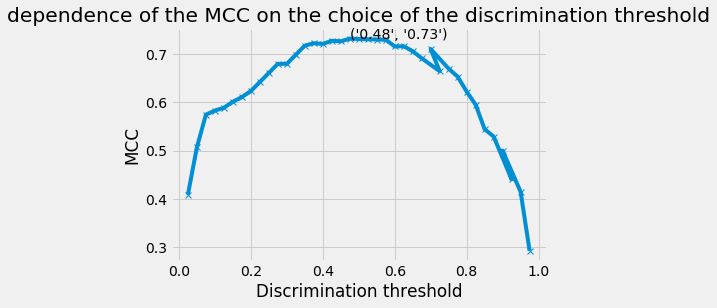

In [109]:
import pylab #let you draw text onto your image

#Annotate
max_y = max(roc.matthews)  # Find the maximum y value
max_Y=f'{max_y:.2}'
max_x = roc.discret_thr[roc.matthews.argmax()]  # Find the x value corresponding to the maximum y value
max_X=f'{max_x:.2}'
print("Model's MCC is %1.2f at an optimal threshold of %1.2f" % (max_y, max_x))
a=pylab.text(max_x, max_y, str((max_X, max_Y)))

#plot
plt.title('dependence of the MCC on the choice of the discrimination threshold')
plt.plot(roc.discret_thr, roc.matthews, 'x-')
plt.xlabel('Discrimination threshold')
plt.ylabel('MCC')
plt.show()

From the plot above, we also see that point where the obtained accuracy reach the maximum is 73%

In [110]:
# Identify the points of the ROC curve where the obtained accuracy and MCC reach the respective maxima
idx_maxacc = np.argmax(roc.accuracy)
idx_maxmcc = np.argmax(roc.matthews)

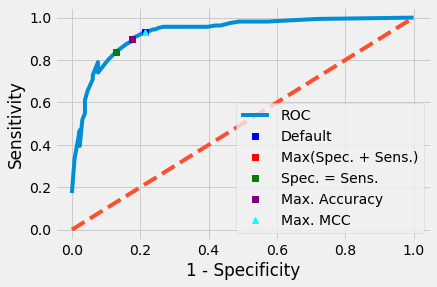

In [111]:
plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')

plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.plot(roc._specificity[idx_default_th], 
         roc.sensitivity[idx_default_th], 
         's', color = 'blue',
         label = 'Default')

plt.plot(roc._specificity[idx_youdensj], 
         roc.sensitivity[idx_youdensj], 
         's', color = 'red',
         label = 'Max(Spec. + Sens.)')

plt.plot(roc._specificity[idx_ballance], 
         roc.sensitivity[idx_ballance], 
         's', color = 'green', 
         label = 'Spec. = Sens.')

plt.plot(roc._specificity[idx_maxacc], 
         roc.sensitivity[idx_maxacc], 
         's', color = 'purple',
         label = 'Max. Accuracy')

plt.plot(roc._specificity[idx_maxmcc], 
         roc.sensitivity[idx_maxmcc], 
         '^', color = 'cyan', 
         label = 'Max. MCC')

plt.legend(loc = 4)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

#### Finally, we shall adjust the discrimination threshold to give us our most accurate logistic model

In [112]:
heart_df_new2.loc[:, 'yhat'] = (heart_df_new2.p > 0.58) * 1
heart_df_new2.yhat.value_counts()

1    163
0    130
Name: yhat, dtype: int64

In [113]:
conf_mat=pd.crosstab(heart_df_new2.target, heart_df_new2.yhat)
conf_mat

yhat,0,1
target,,
0,108,23
1,22,140


In [114]:
#change df to array, because df object has no attribute to 'flatten'
conf_mat_new=conf_mat.to_numpy()
conf_mat_new

array([[108,  23],
       [ 22, 140]], dtype=int64)

The classifier made a total of 293 predictions (i.e, 293 patients for the heart attack). Out of those 293 patients, the classifier predicted that 163 patients are susceptible to heart attack, and 130 patients are not. In reality, 162 patients are susceptible to heart attack, and 131 patients are not. This shows that we have a very good model that can predict results that are very close to the actuals

In [115]:
#We can also extract precision, recall, specificity and f-score
tn, fp, fn, tp = conf_mat_new.flatten() 
print (tn, fp, fn, tp)

108 23 22 140


In [116]:
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

Model's precision is 0.86 and it's recall is 0.86


In [117]:
f_score = 2*((prc*rec)/(prc + rec))
print ("Model's f-score is: %1.2f" % f_score)

Model's f-score is: 0.86


In [118]:
specificity = tn/(tn+fp)
print ("Model's specificity is: %1.2f" % specificity)

Model's specificity is: 0.82


In [119]:
sensitivity = tp/(tp+fn) #True Positive Rate
print ("Model's sensitivity is: %1.2f" % sensitivity)

Model's sensitivity is: 0.86


From the above statistics it is clear that the model is a little more sensitive than specific. The positive values are predicted a little more accurately, than the negatives.

### Conclusion

1. All attributes selected after the elimination process show p-values lower than 5% and thereby suggests significant role in the Heart disease prediction. From our project, we were able to establish the following signs/factors as strong predictors of heart attack. They include sex, chest pain, exercise induced angina (exang), the number of major vessels (ca), thalassemia (thal), maximum heart rate (thalach) and the slope of the peak exercise ST segment (slope)


2. The model predicted with 87% accuracy. This model has a highly, almost balanced sensitivity and specificity, which makes this a good model


3. The Area under the ROC curve is 0.93 which is very satisfactory.

### References

Czepiel, S.A. (1999). Maximum Likelihood Estimation of Logistic Regression Models: Theory and Implementation Retrieved Dec 11, 2018 from czep.net/stat.

Multicollinearity, n.d. Retrieved Dec 11, 2018 from Wikipedia. https://en.wikipedia.org/wiki/Multicollinearity

Roccurves.png (2006). Retrieved Dec 11, 2018 from Wikimedia Commons. https://commons.wikimedia.org/wiki/File:Roccurves.png Creative Commons Attribution-Share Alike 3.0 Unported.

Roc Curve Youden J.png (2014). Retrieved Dec 11, 2018 from Wikimedia commons. https://commons.wikimedia.org/wiki/File:ROC_Curve_Youden_J.png Creative Commons Attribution-Share Alike 4.0 International.

Rodríguez, G. (2007). Lecture Notes on Generalized Linear Models. Chapter 3: Logit Models for Binary Data http://data.princeton.edu/wws509/notes/

Weisstein, E. W. (2018). Maximum Likelihood. MathWorld-A Wolfram Web Resource. Retrieved Dec 11, 2018 form http://mathworld.wolfram.com/MaximumLikelihood.html

Daniel Ananey-Obiri and Enoch Sarku (2020). Predicting the Presence of Heart Diseases using Comparative Data Mining and Machine Learning Algorithms. International Journal of Computer Applications (0975 – 8887). Volume 176 – No. 11